# BIODIVERSITY ANALYSIS REPORT

The conservation of different species within national parks is of utmost importance in safeguarding biodiversity and preserving the delicate ecological balance of our planet. National parks play a vital role as protected areas that support diverse ecosystems and provide a sanctuary for a wide range of plant and animal species. These pristine landscapes offer a unique opportunity for scientists, researchers, and conservationists to study and protect the rich diversity of life on Earth.

As the world faces escalating environmental challenges and the continued loss of biodiversity, understanding the status and conservation needs of species within national parks has become a critical task. Data analysis serves as an essential tool to investigate the distribution, abundance, and conservation status of species within these protected areas. By harnessing the power of data-driven approaches, researchers can gain valuable insights into the factors that impact species populations, assess the effectiveness of conservation efforts, and identify potential threats to vulnerable species.

In this data analysis report, we delve into an exploration of the conservation of different species within various national parks. We harness comprehensive datasets comprising observations of flora and fauna in these parks, along with information on species categories and conservation statuses. By employing various analytical techniques, we aim to shed light on the distribution of species across categories, identify trends in observations, and assess the conservation status of the wildlife within these protected areas.

The findings of this analysis will not only contribute to our understanding of species diversity and conservation within national parks but also inform the development of evidence-based conservation strategies. With the increasing need for effective conservation measures and sustainable management practices, this report strives to provide actionable insights that can contribute to the preservation and protection of these invaluable natural ecosystems.

Through this data analysis, we hope to emphasize the vital role of national parks as havens for biodiversity, underscore the urgency of conservation efforts, and pave the way for informed decision-making to safeguard the delicate balance of nature within these treasured landscapes.

## Analysis method

Here are several analysis methods on the given datasets:


* ##### Data Cleaning and Preparation:
   - Check for missing values and handle them appropriately.
   - Remove any duplicate entries.
   - Merge the two datasets based on the common column.

* ##### Exploratory Data Analysis (EDA):
   - Plot the distribution of observations in the 'observations' column to understand the data's range and spread.
   - Create bar plots to visualize the number of observations for each park in the 'park_name' column.
   - Generate bar plots to show the distribution of species in different 'category' in the 'species' dataset.
   - Create bar plots to visualize the conservation status distribution in the 'conservation_status' column.

* ##### Data Aggregation and Grouping:
   - Group the observations by 'park_name' and calculate the total and average observations per park.
   - Group the species by 'category' and calculate the total count of each category.
   - Group the species by 'conservation_status' and calculate the count of species under each conservation status.

* ##### Statistical Analysis:
   - Perform hypothesis testing to determine if there is a significant difference in observations between different parks or categories.

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

observation = pd.read_csv('observations.csv')

observation.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [15]:
print(observation.info())
print(observation.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None
scientific_name    object
park_name          object
observations        int64
dtype: object


* There is no missing data in each column of `observation` dataframe.
* Each column has appropriate data types. 

In [17]:
print(observation["park_name"].unique())
print(observation["scientific_name"].nunique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
5541


There are 5541 different scientific names found.

In [55]:
observation.isnull().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

There is no missing value in observation dataframe.

In [60]:
observation.duplicated().sum()

15

There are 15 duplicates in `observation` dataframe.

In [62]:
observation.drop_duplicates(inplace=True)
observation.duplicated().sum()

0

After removing duplicates, no more duplicates were found.

In [97]:
species = pd.read_csv('species_info.csv')

species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [21]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


* Each column has 5824 rows except `conservation_status` which is only 191.
* Most of the data in `conservation_status` column is missing hence need further exploration.

In [98]:
species.isnull().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

There are 5633 missing values in `conservation_status` column of species dataframe.

In [99]:
species['conservation_status'].fillna('No Intervention', inplace=True)

Filling missing values with `No Intervention`

In [100]:
species.duplicated().sum()

0

There is no duplicate data in `species` dataframe.

In [101]:
print(species["category"].unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [57]:
print(species["conservation_status"].unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


`nan` is the missing data in the `conservation_status` column.

In [102]:
species.fillna('No Intervention', inplace=True)
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention


We replace `nan` with `No Intervention`.

In [65]:
merged_data = observation.merge(species, on='scientific_name', how='left')
merged_data.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,NaN
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,NaN
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,NaN


Merge both `observation` and `species` dataframes into a single dataframe called `merged_data` on `scientific_name`

In [66]:
merged_data.isnull().sum()

scientific_name            0
park_name                  0
observations               0
category                   0
common_names               0
conservation_status    24721
dtype: int64

* There are 24721 missing data in `conservation_status` column.
* We need to replace the missing data with `No Intervention`.

In [69]:
merged_data['conservation_status'].fillna('No Intervention', inplace=True)
merged_data.isnull().sum()

scientific_name        0
park_name              0
observations           0
category               0
common_names           0
conservation_status    0
dtype: int64

No missing data in `conservation_status` column.

In [70]:
merged_data.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,No Intervention
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,No Intervention
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,No Intervention


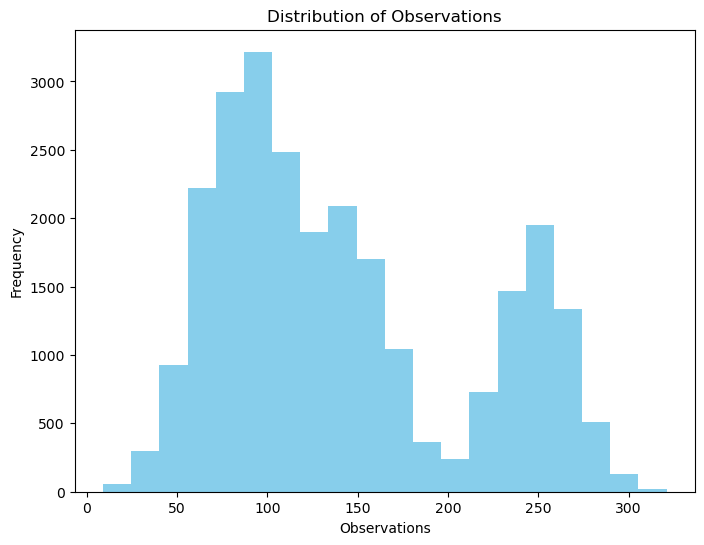

<Figure size 640x480 with 0 Axes>

In [73]:
plt.figure(figsize=(8, 6))
plt.hist(merged_data['observations'], bins=20, color='skyblue')
plt.xlabel('Observations')
plt.ylabel('Frequency')
plt.title('Distribution of Observations')
plt.show()
plt.clf()

- There is a bimodal distribution of observations.
- The highest frequency is at around 100 and 250 observations.

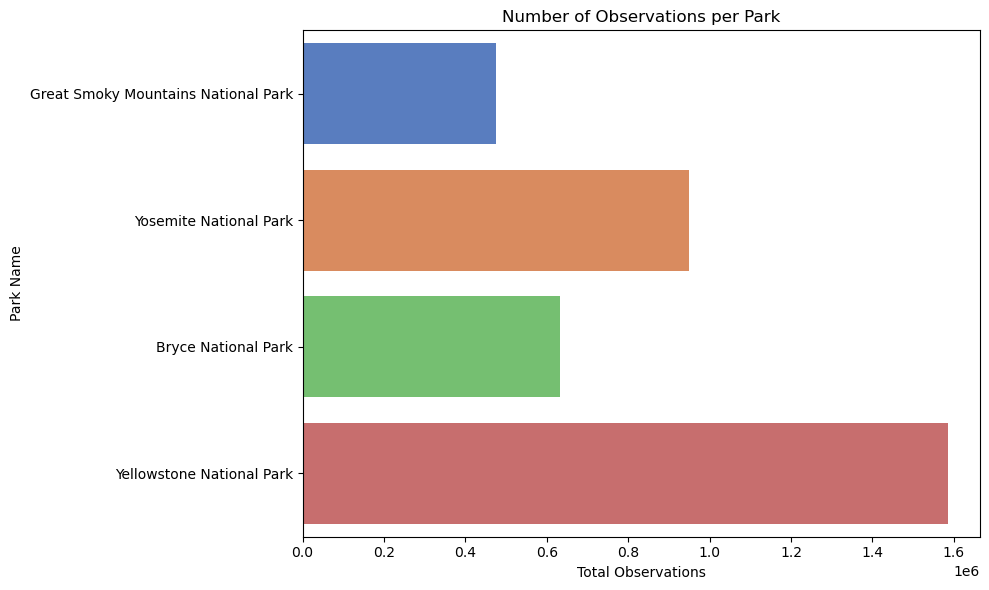

<Figure size 640x480 with 0 Axes>

In [82]:
# Create a bar plot to show the number of observations for each park
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_data, y='park_name', x='observations', estimator=sum, errorbar=None, palette='muted')
plt.ylabel('Park Name')
plt.xlabel('Total Observations')
plt.title('Number of Observations per Park')
plt.tight_layout()
plt.show()
plt.clf()

Yellowstone National Park has the highest observations

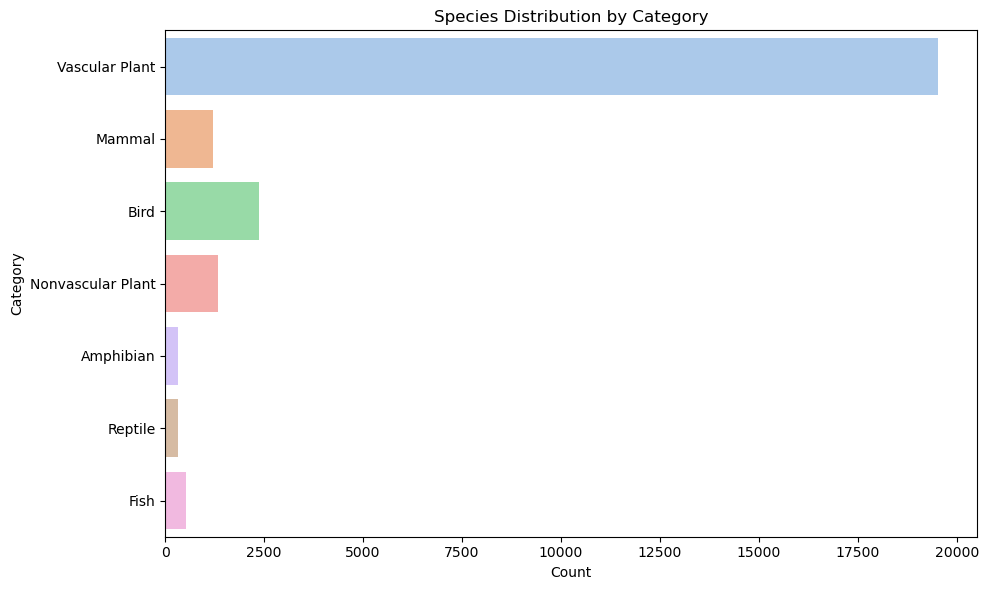

<Figure size 640x480 with 0 Axes>

In [81]:
# Create a bar plot to show the distribution of species in different categories
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, y='category', palette='pastel')
plt.ylabel('Category')
plt.xlabel('Count')
plt.title('Species Distribution by Category')
plt.tight_layout()
plt.show()
plt.clf()

Vascular plant is the most commonly found species.

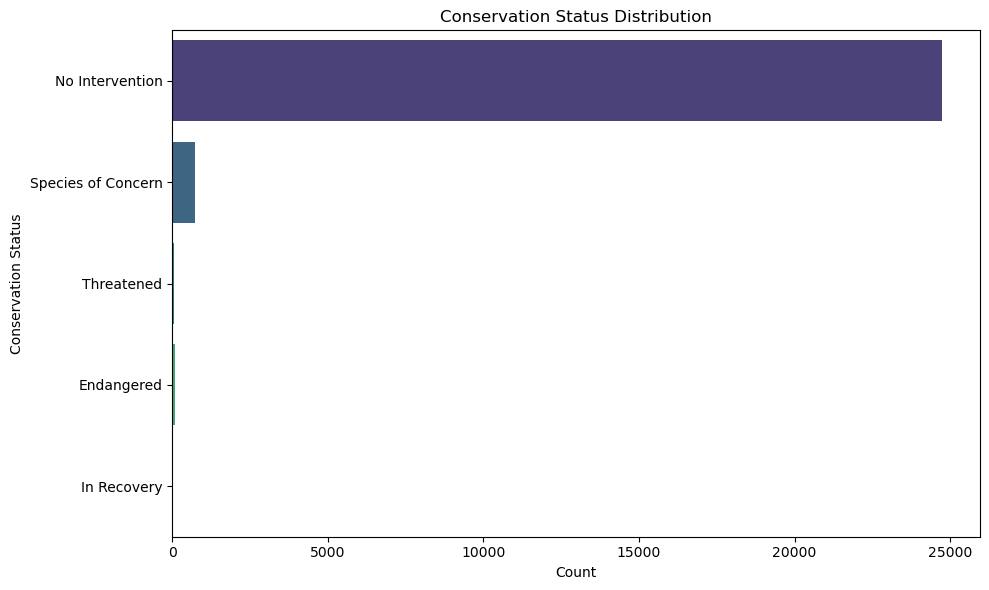

In [104]:
# Create a bar plot to show the conservation status distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, y='conservation_status', palette='viridis')
plt.ylabel('Conservation Status')
plt.xlabel('Count')
plt.title('Conservation Status Distribution')
plt.tight_layout()
plt.show()


Most of the `conservation_status` is `Species of Concern`.

In [87]:
# Group by 'park_name' and calculate total and average observations
observations_grouped = merged_data.groupby('park_name')['observations'].agg(['sum', 'mean']).reset_index()

# Rename the columns for clarity
observations_grouped.rename(columns={'sum': 'total_observations', 'mean': 'average_observations'}, inplace=True)

# Display the aggregated data
observations_grouped

,park_name,total_observations,average_observations
0,Bryce National Park,633043,98.820325
1,Great Smoky Mountains National Park,473979,74.105535
2,Yellowstone National Park,1584890,247.755198
3,Yosemite National Park,948460,148.150578


Yellowstone National Park has the highest total observations and average observations.

In [89]:
# Group by 'category' and calculate the total count
species_grouped_by_category = merged_data.groupby('category').size().reset_index(name='total_count')

# Display the aggregated data
species_grouped_by_category

,category,total_count
0,Amphibian,328
1,Bird,2361
2,Fish,524
3,Mammal,1198
4,Nonvascular Plant,1332
5,Reptile,324
6,Vascular Plant,19534


Vascular plant has the highest total count.

In [91]:
# Group by 'conservation_status' and calculate the count
species_grouped_by_conservation = merged_data.groupby('conservation_status').size().reset_index(name='species_count')

# Display the aggregated data
species_grouped_by_conservation

,conservation_status,species_count
0,Endangered,80
1,In Recovery,24
2,No Intervention,24721
3,Species of Concern,732
4,Threatened,44


Most of the conservation status is no intervention.

In [96]:
import scipy.stats as stats

# Perform ANOVA test
result_anova = stats.f_oneway(
    merged_data[merged_data['park_name'] == 'Great Smoky Mountains National Park']['observations'],
    merged_data[merged_data['park_name'] == 'Yosemite National Park']['observations'],
    merged_data[merged_data['park_name'] == 'Bryce National Park']['observations'],
    merged_data[merged_data['park_name'] == 'Yellowstone National Park']['observations']
)

# Print the results
print("ANOVA p-value:", result_anova.pvalue)
if result_anova.pvalue < 0.05:
    print("There is a significant difference in observations between different parks.")
else:
    print("There is no significant difference in observations between different parks.")


ANOVA p-value: 0.0
There is a significant difference in observations between different parks.


###### Hypothesis Testing (ANOVA):
- To test if there is a significant difference in observations between different parks, we can use Analysis of Variance (ANOVA). 
- This test compares the means of multiple groups to determine if there are significant differences among them.

###### Conclusion:
- 100 and 250 observations are the most frequently found in the parks.
- YellowStone National Park has the highest observations.
- Vascular plant has the highest number of species by category.
- Most of the conservation status is without any interventions.
- There is a significant difference in observations between different parks.

### Further research:

- We need to further investigate the factors that could influence the number of observations in different parks.
- Some of the key factors that could affect the number of observations are:

###### Biodiversity
- Parks with higher biodiversity are likely to have a greater variety of species, leading to more observations. Biodiversity can be influenced by factors such as climate, geography, and habitat diversity within the park.

###### Park Size
- Larger parks provide more habitats and resources for wildlife, which can lead to a higher number of observations.

###### Conservation Efforts
- Parks with active conservation efforts and proper management may attract more researchers, naturalists, and citizen scientists, resulting in increased observations.

###### Accessibility
- Parks that are easily accessible to researchers and visitors are more likely to have higher observation rates compared to remote or difficult-to-reach parks.

###### Seasonality
- The number of observations may vary depending on the time of year. Some species may be more active or visible during specific seasons, leading to fluctuations in observations.

###### Species Migration and Seasonal Movement
- Parks that are along migration routes or seasonal movement patterns of certain species may experience increased observations during those times.

###### Habitat Quality
- The overall health and quality of habitats within a park can affect the abundance and diversity of species, impacting the number of observations.

###### Research Activities
- The level of scientific research and monitoring conducted in a park can influence the number of observations recorded.

###### Environmental Events
- Natural events like wildfires, floods, or extreme weather can influence the distribution and behavior of species, leading to changes in observation patterns.

###### Visitor Activities
- Parks that attract a large number of visitors for recreational purposes may also have more observations, as visitors may encounter and record sightings of wildlife.

###### Data Collection Efforts
- The frequency and intensity of data collection efforts, such as research surveys, monitoring programs, and citizen science initiatives, can impact the number of observations.

These factors interact in complex ways, and the specific influence of each factor can vary from one park to another. Understanding these factors can help in interpreting observation data and guide conservation efforts within different parks.